In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import random
import csv

In [3]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [4]:
print("Number of images in the training dataset:", train_images.shape[0])
print("Number of images in the testing dataset:", test_images.shape[0])

Number of images in the training dataset: 60000
Number of images in the testing dataset: 10000


In [5]:
print(f"Shape of the images in the training dataset: {train_images[0].shape}")

Shape of the images in the training dataset: (28, 28)


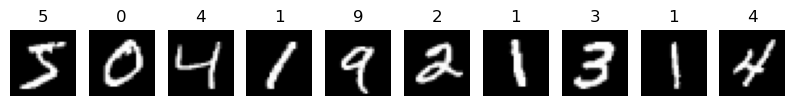

In [6]:
fig, axes  = plt.subplots(1, 10, figsize = (10, 10))
for i in range(10):
    axes[i].imshow(train_images[i].reshape(28,28), cmap='gray')
    axes[i].set_title(train_labels[i])
    axes[i].axis('off')
plt.show()

## Making the FCNN

Nomenclature: Each model is is named as model_activation_xx_xx where activation specifies the type of activation function used, the numbers following represent the number of neurons in each layer. \
For example, model_relu_64_32 means that the model uses relu activation function and has two layers with 64 and 32 neurons respectively.

### Using RELU

In [7]:
model_relu_128_64 = models.Sequential([
    layers.Flatten(input_shape = (28, 28, 1)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
], name = 'model_relu_128_64')

In [8]:
model_relu_128_64.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

histroy_model_relu_128_64 = model_relu_128_64.fit(
    train_images, 
    train_labels,
    epochs=5
)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2409 - accuracy: 0.9288
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1008 - accuracy: 0.9692
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0710 - accuracy: 0.9776
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0543 - accuracy: 0.9826
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0437 - accuracy: 0.9857


In [9]:
test_loss_model_relu_128_64, test_accuracy_model_relu_128_64 = model_relu_128_64.evaluate(test_images, test_labels)
print(f'Accuracy of the neural network on the {test_images.shape[0]} test images: {test_accuracy_model_relu_128_64*100:.2f}%')

313/313 [==============================] - 0s 884us/step - loss: 0.1022 - accuracy: 0.9714
Accuracy of the neural network on the 10000 test images: 97.14%


In [10]:
def plot_learning_curve (history_model, acc ,name = 'learning curve'):
    plt.plot(
        range(1, int(len(history_model.history['accuracy'])+1)),
        history_model.history['accuracy'],
        label = 'accuracy while learning'
        )
    plt.title(name)
    plt.axhline(acc, color = 'green', linestyle = '--', label = f'accuracy on test images ({acc*100:.2f}%)')
    plt.xlabel('No of learning cycles')
    plt.legend(loc = 'lower right')
    plt.ylabel('Accuracy')
    plt.ylim(top = 1)
    plt.show()

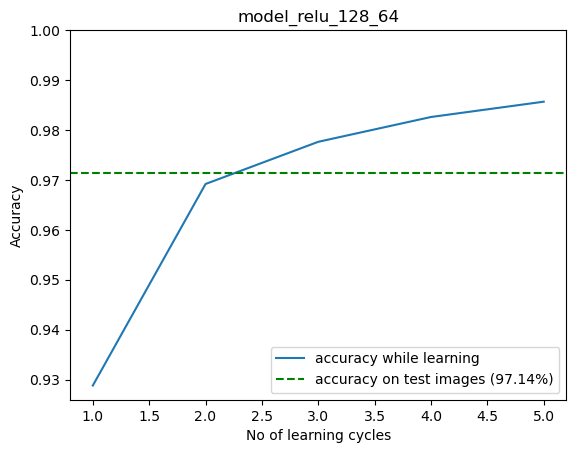

In [11]:
plot_learning_curve(histroy_model_relu_128_64, test_accuracy_model_relu_128_64, model_relu_128_64.name)

In [12]:
def view_classify(image, probabilities):
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(image, cmap='gray')
    ax1.axis('off')
    ax2.barh(np.arange(10), probabilities)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0,1.1)
    plt.tight_layout()

9987
1/1 [==============================] - 0s 75ms/step


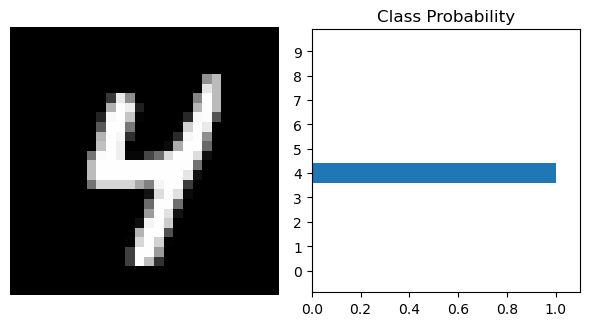

In [13]:
i = random.randint(0,10000)
print(i)
image, label = test_images[i], test_labels[i]
probabilities = model_relu_128_64.predict(image.reshape(1,28,28,1))
view_classify(image, probabilities[0])

### Using Sigmoid

In [20]:
model_sigmoid_128_64 = models.Sequential([
    layers.Flatten(input_shape = (28, 28, 1)),
    layers.Dense(128, activation='sigmoid'),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(10, activation='softmax')
], name = 'model_sigmoid_128_64')

In [21]:
model_sigmoid_128_64.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

histroy_model_sigmoid_128_64 = model_sigmoid_128_64.fit(
    train_images, 
    train_labels,
    epochs=5
)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4772 - accuracy: 0.8791
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1774 - accuracy: 0.9476
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1226 - accuracy: 0.9632
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0903 - accuracy: 0.9728
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0702 - accuracy: 0.9794


In [22]:
test_loss_model_sigmoid_128_64, test_accuracy_model_sigmoid_128_64 = model_sigmoid_128_64.evaluate(test_images, test_labels)
print(f'Accuracy of the neural network on the {test_images.shape[0]} test images: {test_accuracy_model_sigmoid_128_64*100:.2f}%')

313/313 [==============================] - 0s 821us/step - loss: 0.0856 - accuracy: 0.9738
Accuracy of the neural network on the 10000 test images: 97.38%


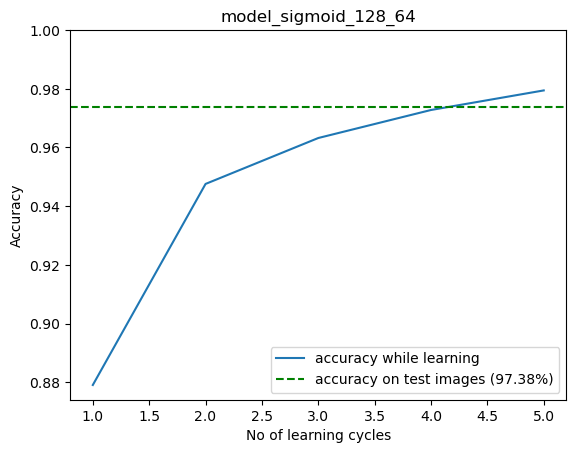

In [23]:
plot_learning_curve(histroy_model_sigmoid_128_64, test_accuracy_model_sigmoid_128_64, model_sigmoid_128_64.name)

8149
1/1 [==============================] - 0s 42ms/step


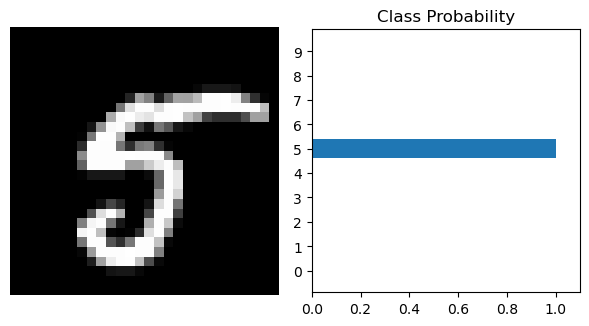

In [24]:
i = random.randint(1,10000)
print(i)
image, label = test_images[i], test_labels[i]
probabilities = model_sigmoid_128_64.predict(image.reshape(1,28,28,1))
view_classify(image, probabilities[0])

1/1 [==============================] - 0s 12ms/step


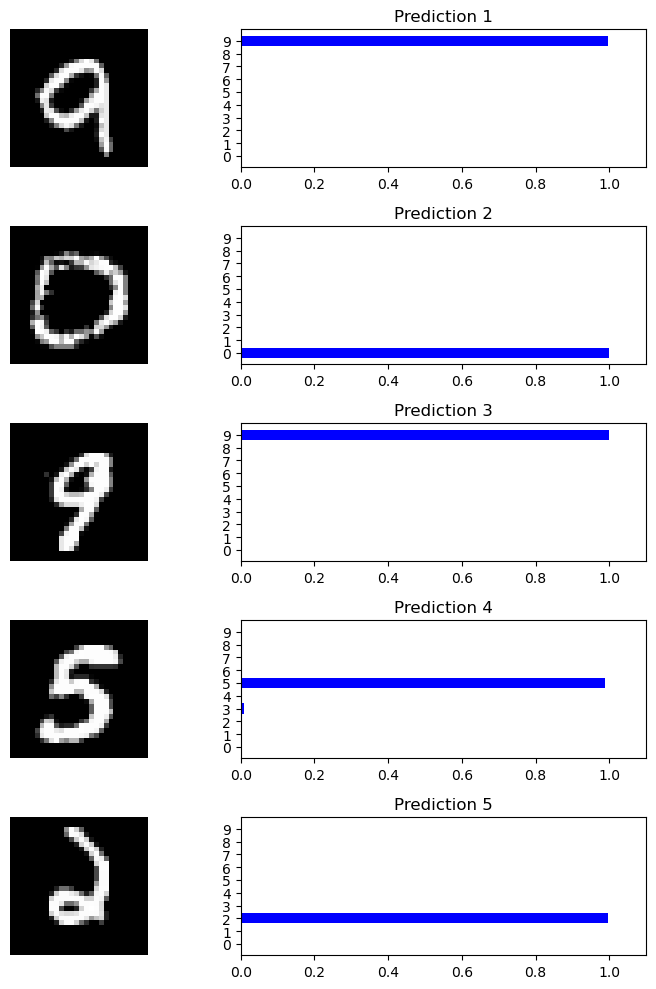

In [25]:
def view_classify_multiple(images, probabilities, num_samples=5):
    fig, axes = plt.subplots(num_samples, 2, figsize=(8, 2 * num_samples))  # Grid of plots

    for i in range(num_samples):
        # Show the image
        axes[i, 0].imshow(images[i], cmap='gray')
        axes[i, 0].axis('off')

        # Show the probability bar chart
        axes[i, 1].barh(np.arange(10), probabilities[i], color='blue')
        axes[i, 1].set_yticks(np.arange(10))
        axes[i, 1].set_xlim(0, 1.1)
        axes[i, 1].set_title(f'Prediction {i+1}')

    plt.tight_layout()
    plt.show()

# Number of samples to classify
num_samples = 5

# Select random indices
indices = random.sample(range(len(test_images)), num_samples)

# Extract images and labels
images = [test_images[i] for i in indices]
labels = [test_labels[i] for i in indices]

# Predict probabilities
probabilities = [np.squeeze(model_sigmoid_128_64.predict(image.reshape(1, 28, 28, 1))) for image in images]

# Visualize all results
view_classify_multiple(images, probabilities, num_samples)


## Comparing Models

1/1 [==============================] - 0s 9ms/step


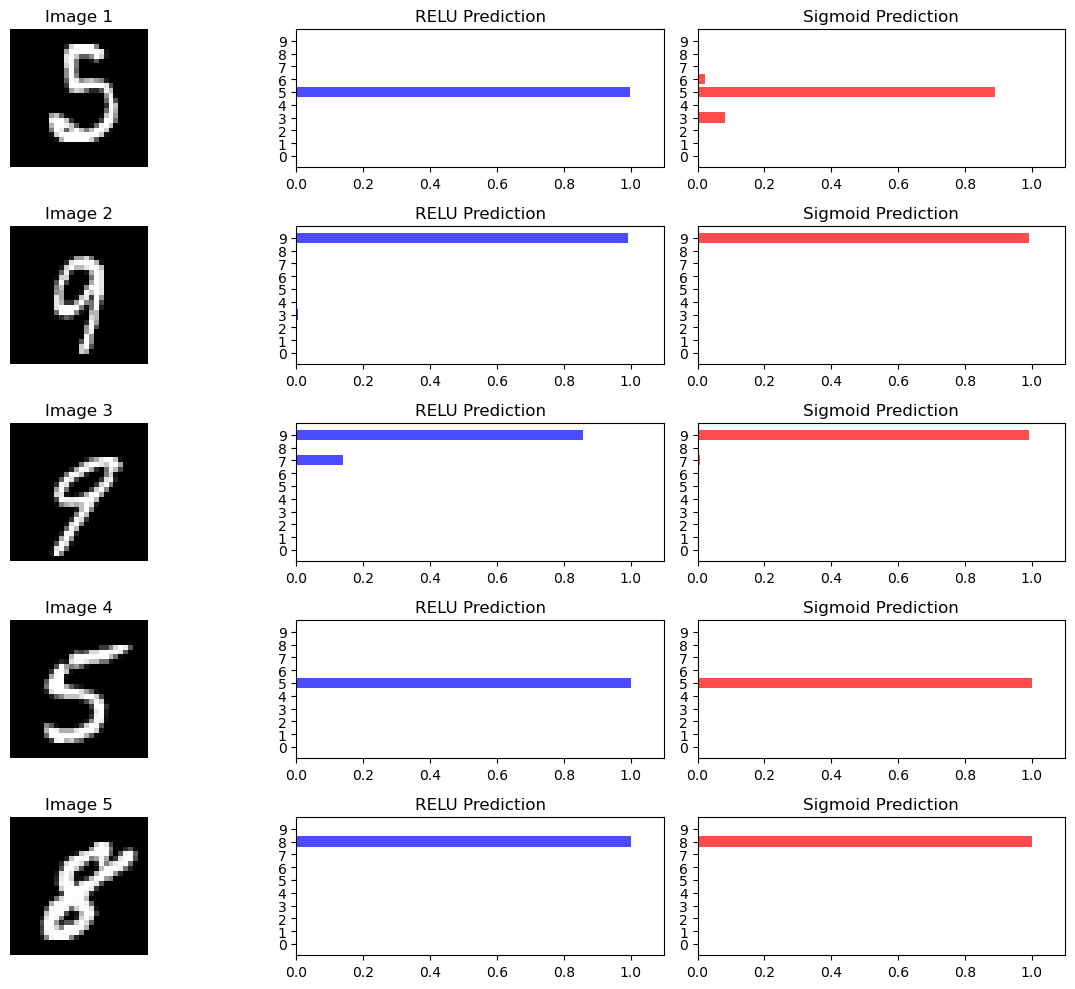

In [27]:
def view_classify_multiple(images, probabilities_one, probabilities_two, num_samples=5):
    fig, axes = plt.subplots(num_samples, 3, figsize=(12, 2 * num_samples))  # Grid of plots

    for i in range(num_samples):
        # Show the image
        axes[i, 0].imshow(images[i], cmap='gray')
        axes[i, 0].axis('off')
        axes[i, 0].set_title(f"Image {i+1}")

        # Model 1 predictions
        axes[i, 1].barh(np.arange(10), probabilities_one[i], color='blue', alpha=0.7)
        axes[i, 1].set_yticks(np.arange(10))
        axes[i, 1].set_xlim(0, 1.1)
        axes[i, 1].set_title('RELU Prediction')

        # Model 2 predictions
        axes[i, 2].barh(np.arange(10), probabilities_two[i], color='red', alpha=0.7)
        axes[i, 2].set_yticks(np.arange(10))
        axes[i, 2].set_xlim(0, 1.1)
        axes[i, 2].set_title('Sigmoid Prediction')

    plt.tight_layout()
    plt.show()

# Number of samples to classify
num_samples = 5

# Select random indices
indices = random.sample(range(len(test_images)), num_samples)

# Extract images
images = [test_images[i] for i in indices]

# Predict with both models
probabilities_one = [np.squeeze(model_relu_128_64.predict(image.reshape(1, 28, 28, 1))) for image in images]
probabilities_two = [np.squeeze(model_sigmoid_128_64.predict(image.reshape(1, 28, 28, 1))) for image in images]

# Visualize all results
view_classify_multiple(images, probabilities_one, probabilities_two, num_samples)


## Playing around with hidden layers

#### RELU 32_17

In [32]:
model_relu_32_17 = models.Sequential([
    layers.Flatten(input_shape = (28, 28, 1)),
    layers.Dense(32, activation='relu'),
    layers.Dense(17, activation='relu'),
    layers.Dense(10, activation='softmax')
], name = 'model_relu_32_17')

In [33]:
model_relu_32_17.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_model_relu_32_17 = model_relu_32_17.fit(
    train_images, 
    train_labels,
    epochs=10
)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3495 - accuracy: 0.8977
Epoch 2/10
1875/1875 [==============================] - 2s 879us/step - loss: 0.1725 - accuracy: 0.9493
Epoch 3/10
1875/1875 [==============================] - 2s 825us/step - loss: 0.1344 - accuracy: 0.9599
Epoch 4/10
1875/1875 [==============================] - 2s 823us/step - loss: 0.1135 - accuracy: 0.9660
Epoch 5/10
1875/1875 [==============================] - 2s 818us/step - loss: 0.0992 - accuracy: 0.9695
Epoch 6/10
1875/1875 [==============================] - 2s 834us/step - loss: 0.0899 - accuracy: 0.9725
Epoch 7/10
1875/1875 [==============================] - 2s 826us/step - loss: 0.0810 - accuracy: 0.9750
Epoch 8/10
1875/1875 [==============================] - 2s 822us/step - loss: 0.0745 - accuracy: 0.9770
Epoch 9/10
1875/1875 [==============================] - 2s 811us/step - loss: 0.0684 - accuracy: 0.9786
Epoch 10/10
1875/1875 [==============================] - 2s 819us/

In [39]:
test_loss_model_relu_32_17, test_accuracy_model_relu_32_17 = model_relu_32_17.evaluate(test_images, test_labels)
print(f'Accuracy of the neural network on the {test_images.shape[0]} test images: {test_accuracy_model_relu_32_17*100:.2f}%')

313/313 [==============================] - 0s 800us/step - loss: 0.1187 - accuracy: 0.9670
Accuracy of the neural network on the 10000 test images: 96.70%


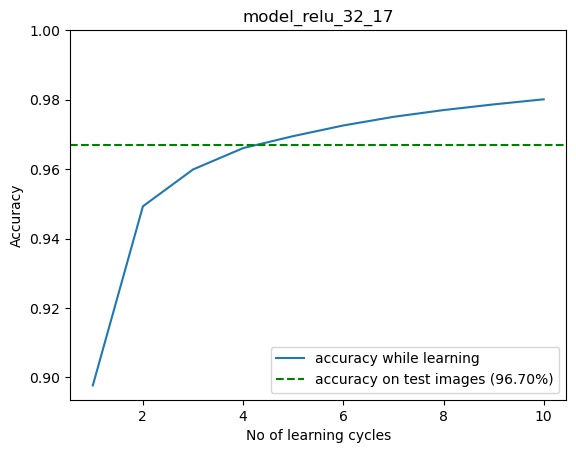

In [40]:
plot_learning_curve(history_model_relu_32_17, test_accuracy_model_relu_32_17, model_relu_32_17.name)

#### RELU 10_03

In [ ]:
model_relu_10_03 = models.Sequential([
    layers.Flatten(input_shape = (28, 28, 1)),
    layers.Dense(10, activation='relu'),
    layers.Dense(3, activation='relu'),
    layers.Dense(10, activation='softmax')
], name = 'model_relu_10_03')

In [38]:
model_relu_10_03.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_model_relu_10_03 = model_relu_10_03.fit(
    train_images, 
    train_labels,
    epochs=10
)

Epoch 1/10
1875/1875 [==============================] - 2s 779us/step - loss: 1.0392 - accuracy: 0.6684
Epoch 2/10
1875/1875 [==============================] - 2s 887us/step - loss: 0.5734 - accuracy: 0.8514
Epoch 3/10
1875/1875 [==============================] - 1s 794us/step - loss: 0.4861 - accuracy: 0.8714
Epoch 4/10
1875/1875 [==============================] - 1s 775us/step - loss: 0.4469 - accuracy: 0.8823
Epoch 5/10
1875/1875 [==============================] - 1s 783us/step - loss: 0.4191 - accuracy: 0.8898
Epoch 6/10
1875/1875 [==============================] - 1s 766us/step - loss: 0.4001 - accuracy: 0.8945
Epoch 7/10
1875/1875 [==============================] - 1s 762us/step - loss: 0.3854 - accuracy: 0.8985
Epoch 8/10
1875/1875 [==============================] - 1s 768us/step - loss: 0.3734 - accuracy: 0.9021
Epoch 9/10
1875/1875 [==============================] - 1s 762us/step - loss: 0.3627 - accuracy: 0.9047
Epoch 10/10
1875/1875 [==============================] - 1s 797u

In [41]:
test_loss_model_relu_10_03, test_accuracy_model_relu_10_03 = model_relu_10_03.evaluate(test_images, test_labels)
print(f'Accuracy of the neural network on the {test_images.shape[0]} test images: {test_accuracy_model_relu_10_03*100:.2f}%')

313/313 [==============================] - 0s 701us/step - loss: 0.3745 - accuracy: 0.9023
Accuracy of the neural network on the 10000 test images: 90.23%


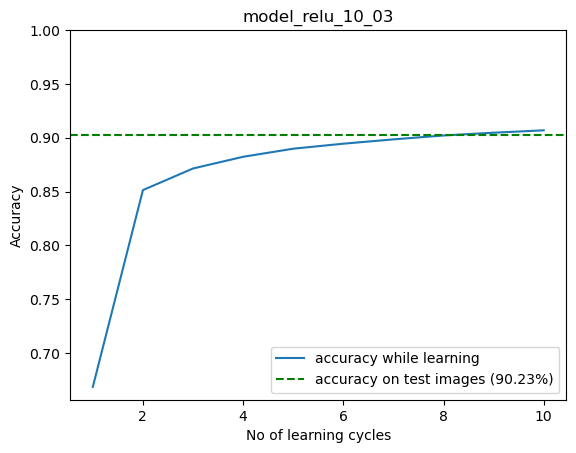

In [42]:
plot_learning_curve(history_model_relu_10_03, test_accuracy_model_relu_10_03, model_relu_10_03.name)

#### RELU 08_00

In [61]:
model_relu_08_00 = models.Sequential([
    layers.Flatten(input_shape = (28, 28, 1)),
    layers.Dense(8, activation='relu'),
    layers.Dense(10, activation='softmax')
], name = 'model_relu_08_00')

In [62]:
model_relu_08_00.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_model_relu_08_00 = model_relu_08_00.fit(
    train_images, 
    train_labels,
    epochs=10
)

Epoch 1/10
1875/1875 [==============================] - 2s 896us/step - loss: 0.6009 - accuracy: 0.8295
Epoch 2/10
1875/1875 [==============================] - 1s 732us/step - loss: 0.3313 - accuracy: 0.9043
Epoch 3/10
1875/1875 [==============================] - 1s 784us/step - loss: 0.3034 - accuracy: 0.9128
Epoch 4/10
1875/1875 [==============================] - 1s 765us/step - loss: 0.2882 - accuracy: 0.9177
Epoch 5/10
1875/1875 [==============================] - 1s 734us/step - loss: 0.2784 - accuracy: 0.9207
Epoch 6/10
1875/1875 [==============================] - 2s 803us/step - loss: 0.2725 - accuracy: 0.9232
Epoch 7/10
1875/1875 [==============================] - 1s 774us/step - loss: 0.2657 - accuracy: 0.9248
Epoch 8/10
1875/1875 [==============================] - 1s 735us/step - loss: 0.2618 - accuracy: 0.9243
Epoch 9/10
1875/1875 [==============================] - 1s 724us/step - loss: 0.2586 - accuracy: 0.9262
Epoch 10/10
1875/1875 [==============================] - 1s 733u

In [63]:
test_loss_model_relu_08_00, test_accuracy_model_relu_08_00 = model_relu_08_00.evaluate(test_images, test_labels)
print(f'Accuracy of the neural network on the {test_images.shape[0]} test images: {test_accuracy_model_relu_08_00*100:.2f}%')

313/313 [==============================] - 0s 657us/step - loss: 0.2649 - accuracy: 0.9257
Accuracy of the neural network on the 10000 test images: 92.57%


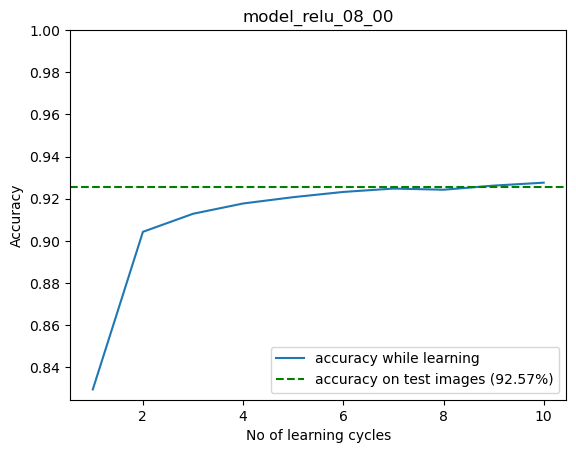

In [64]:
plot_learning_curve(history_model_relu_08_00, test_accuracy_model_relu_08_00, model_relu_08_00.name)

#### Model 00_00

In [67]:
model_00_00 = models.Sequential([
    layers.Flatten(input_shape = (28, 28, 1)),
    layers.Dense(10, activation='softmax')
], name = 'model_00_00')

In [68]:
model_00_00.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_model_00_00 = model_00_00.fit(
    train_images, 
    train_labels,
    epochs=10
)

Epoch 1/10
1875/1875 [==============================] - 2s 855us/step - loss: 0.4683 - accuracy: 0.8783
Epoch 2/10
1875/1875 [==============================] - 2s 821us/step - loss: 0.3040 - accuracy: 0.9160
Epoch 3/10
1875/1875 [==============================] - 1s 705us/step - loss: 0.2836 - accuracy: 0.9212
Epoch 4/10
1875/1875 [==============================] - 1s 701us/step - loss: 0.2735 - accuracy: 0.9238
Epoch 5/10
1875/1875 [==============================] - 1s 709us/step - loss: 0.2664 - accuracy: 0.9254
Epoch 6/10
1875/1875 [==============================] - 1s 704us/step - loss: 0.2616 - accuracy: 0.9268
Epoch 7/10
1875/1875 [==============================] - 1s 709us/step - loss: 0.2586 - accuracy: 0.9283
Epoch 8/10
1875/1875 [==============================] - 1s 703us/step - loss: 0.2556 - accuracy: 0.9290
Epoch 9/10
1875/1875 [==============================] - 1s 708us/step - loss: 0.2530 - accuracy: 0.9298
Epoch 10/10
1875/1875 [==============================] - 1s 712u

In [69]:
test_loss_model_00_00, test_accuracy_model_00_00 = model_00_00.evaluate(test_images, test_labels)
print(f'Accuracy of the neural network on the {test_images.shape[0]} test images: {test_accuracy_model_00_00*100:.2f}%')

313/313 [==============================] - 0s 645us/step - loss: 0.2645 - accuracy: 0.9278
Accuracy of the neural network on the 10000 test images: 92.78%


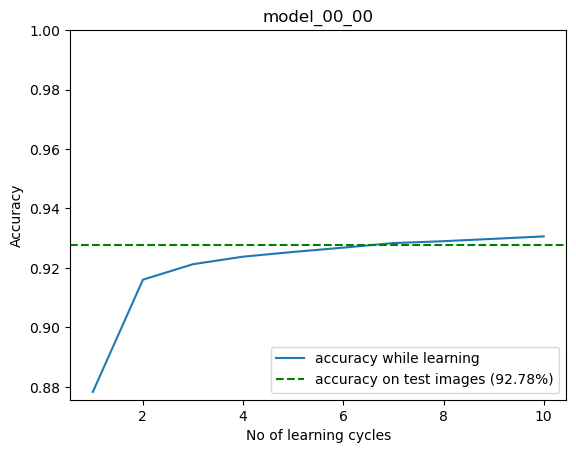

In [70]:
plot_learning_curve(history_model_00_00, test_accuracy_model_00_00, model_00_00.name)

#### Comparison

1/1 [==============================] - 0s 14ms/step


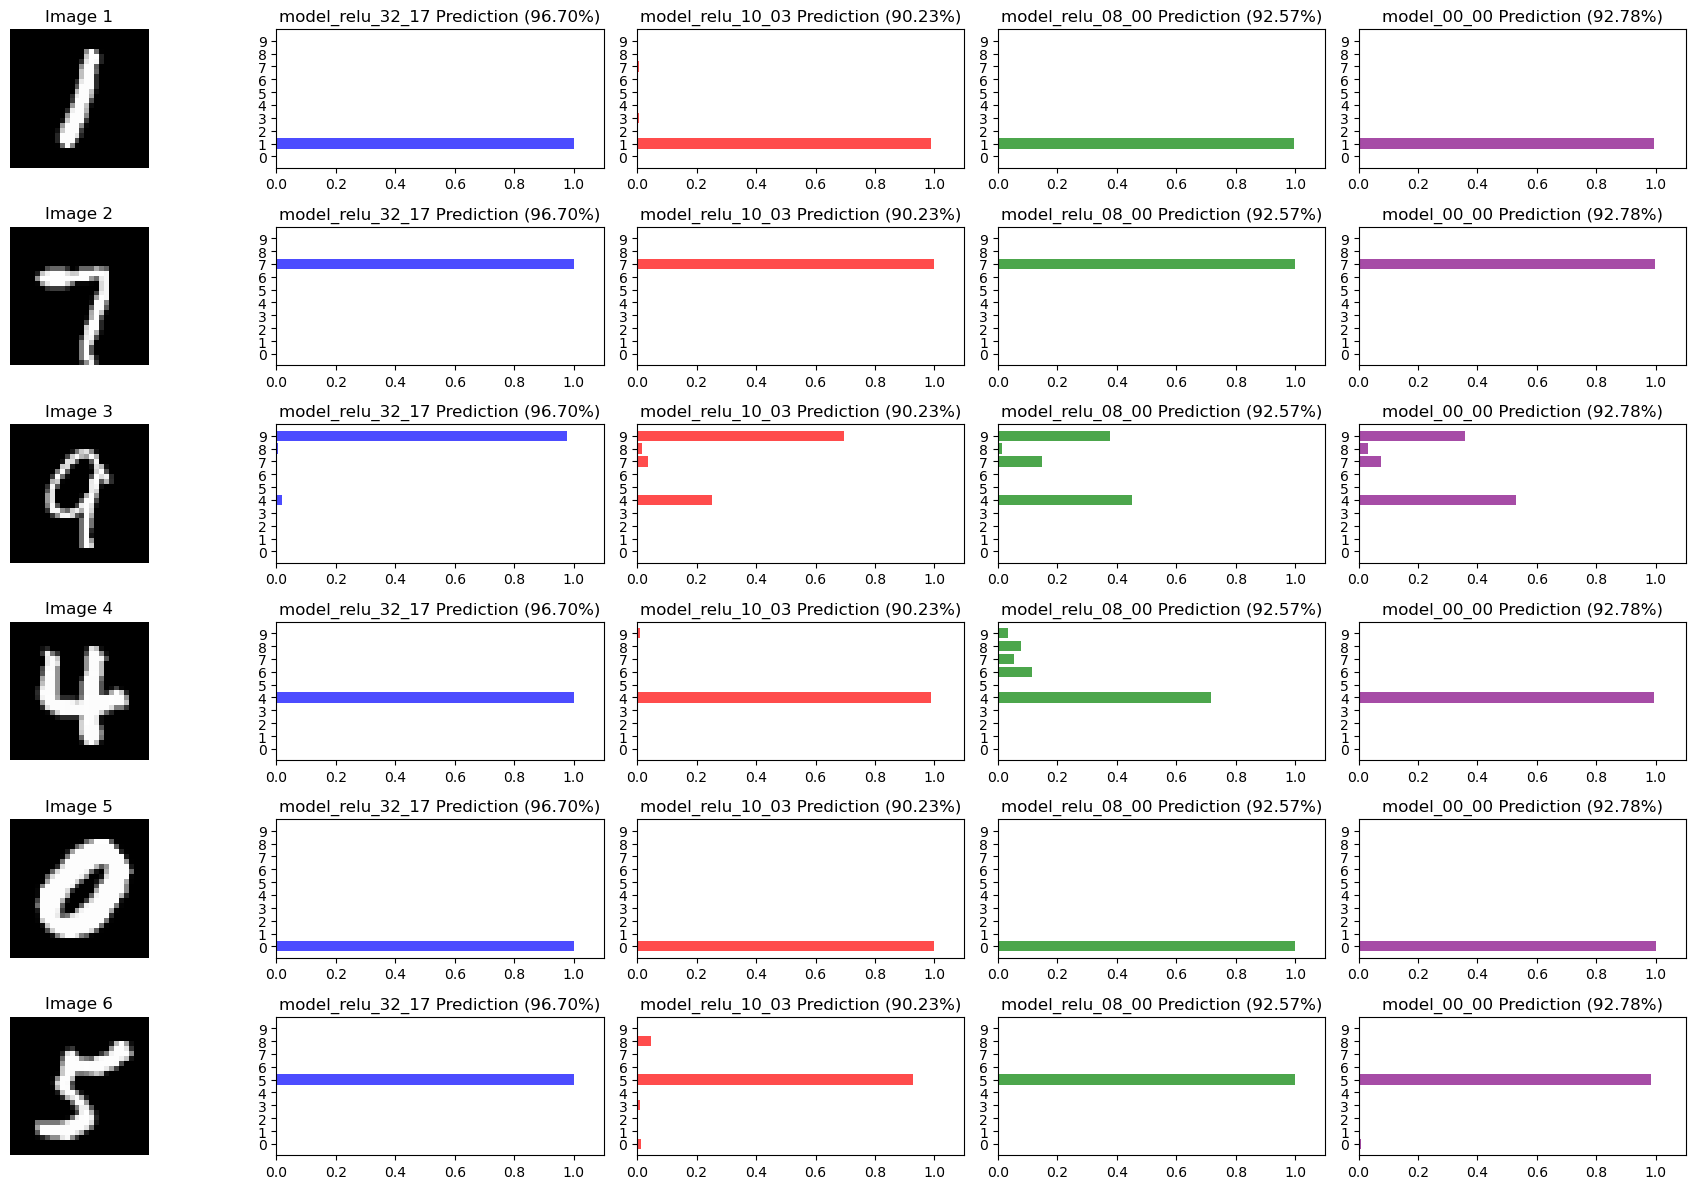

In [71]:
def view_classify_multiple(images, probabilities_one, probabilities_two, probabilities_three, probabilities_four, num_samples=5):
    fig, axes = plt.subplots(num_samples, 5, figsize=(18, 2 * num_samples))  # Grid of plots

    for i in range(num_samples):
        # Show the image
        axes[i, 0].imshow(images[i], cmap='gray')
        axes[i, 0].axis('off')
        axes[i, 0].set_title(f"Image {i+1}")

        # Model 1 predictions
        axes[i, 1].barh(np.arange(10), probabilities_one[i], color='blue', alpha=0.7)
        axes[i, 1].set_yticks(np.arange(10))
        axes[i, 1].set_xlim(0, 1.1)
        axes[i, 1].set_title(f'model_relu_32_17 Prediction ({(test_accuracy_model_relu_32_17*100):.2f}%)')

        # Model 2 predictions
        axes[i, 2].barh(np.arange(10), probabilities_two[i], color='red', alpha=0.7)
        axes[i, 2].set_yticks(np.arange(10))
        axes[i, 2].set_xlim(0, 1.1)
        axes[i, 2].set_title(f'model_relu_10_03 Prediction ({(test_accuracy_model_relu_10_03*100):.2f}%)')

        # Model 3 predictions
        axes[i, 3].barh(np.arange(10), probabilities_three[i], color='green', alpha=0.7)
        axes[i, 3].set_yticks(np.arange(10))
        axes[i, 3].set_xlim(0, 1.1)
        axes[i, 3].set_title(f'model_relu_08_00 Prediction ({(test_accuracy_model_relu_08_00*100):.2f}%)')

        # Model 4 predictions
        axes[i, 4].barh(np.arange(10), probabilities_four[i], color='purple', alpha=0.7)
        axes[i, 4].set_yticks(np.arange(10))
        axes[i, 4].set_xlim(0, 1.1)
        axes[i, 4].set_title(f'model_00_00 Prediction ({(test_accuracy_model_00_00*100):.2f}%)')

    plt.tight_layout()
    plt.show()

# Number of samples to classify
num_samples = 6

# Select random indices
indices = random.sample(range(len(test_images)), num_samples)

# Extract images
images = [test_images[i] for i in indices]

# Predict with all models
probabilities_one = [np.squeeze(model_relu_32_17.predict(image.reshape(1, 28, 28, 1))) for image in images]
probabilities_two = [np.squeeze(model_relu_10_03.predict(image.reshape(1, 28, 28, 1))) for image in images]
probabilities_three = [np.squeeze(model_relu_08_00.predict(image.reshape(1, 28, 28, 1))) for image in images]
probabilities_four = [np.squeeze(model_00_00.predict(image.reshape(1, 28, 28, 1))) for image in images]

# Visualize all results
view_classify_multiple(images, probabilities_one, probabilities_two, probabilities_three, probabilities_four, num_samples)


## Saving Weight Files

In [72]:
# Save weights to a CSV file
def save_weights_to_csv(model, filename=f'weights.csv'):
    filename= f'weights_{model.name}.csv'
    with open(filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        
        for layer in model.layers:
            weights = layer.get_weights()  # [weights, biases]
            if weights:  # Some layers might not have weights (e.g., activation layers)
                writer.writerow(["Layer", layer.name])
                writer.writerow(["Weights"])
                writer.writerows(weights[0])  # Save weight matrix
                writer.writerow(["Biases"])
                writer.writerow(weights[1])  # Save biases
                writer.writerow([])  # Empty row for separation
    print("Weights saved successfully.")

In [73]:
save_weights_to_csv(model_relu_32_17)

Weights saved successfully.


In [74]:
save_weights_to_csv(model_relu_10_03)

Weights saved successfully.


In [75]:
save_weights_to_csv(model_relu_08_00)

Weights saved successfully.


In [76]:
save_weights_to_csv(model_00_00)

Weights saved successfully.
